## Research Notebook for 01 XAU Bot

This is a research notebook where we can experiment with our strategies and models before implementing them into the live trading bot. This document will contain trading logic and its backtest over historical data.

In [26]:
import MetaTrader5 as mt5
import pandas as pd
import numpy as np
import talib
import time
from datetime import datetime
import matplotlib.pyplot as plt
import vectorbt as vbt
from matplotlib import cycler
%matplotlib inline

In [25]:
def plt_dark():
       colors = cycler('color',
                     ['#669FEE', '#66EE91', '#9988DD',
                     '#EECC55', '#88BB44', '#FFBBBB'])
       plt.rc('figure', facecolor='#313233')
       plt.rc('axes', facecolor="#313233", edgecolor='none',
              axisbelow=True, grid=True, prop_cycle=colors,
              labelcolor='gray')
       plt.rc('grid', color='474A4A', linestyle='solid')
       plt.rc('xtick', color='gray')
       plt.rc('ytick', direction='out', color='gray')
       plt.rc('legend', facecolor="#313233", edgecolor="#313233")
       plt.rc("text", color="#C9C9C9")
       plt.rc('figure', facecolor='#313233')
plt_dark()

c:\Users\User\anaconda3\anaconda_3\lib\site-packages\vectorbt\generic\stats_builder.py:396: UserWarning:

Metric 'sharpe_ratio' requires frequency to be set

c:\Users\User\anaconda3\anaconda_3\lib\site-packages\vectorbt\generic\stats_builder.py:396: UserWarning:

Metric 'calmar_ratio' requires frequency to be set

c:\Users\User\anaconda3\anaconda_3\lib\site-packages\vectorbt\generic\stats_builder.py:396: UserWarning:

Metric 'omega_ratio' requires frequency to be set

c:\Users\User\anaconda3\anaconda_3\lib\site-packages\vectorbt\generic\stats_builder.py:396: UserWarning:

Metric 'sortino_ratio' requires frequency to be set



Start                             0.000000
End                           14220.000000
Period                        14221.000000
Start Value                     100.000000
End Value                       100.000000
Total Return [%]                  0.000000
Benchmark Return [%]             -4.805922
Max Gross Exposure [%]            0.000000
Total Fees Paid                   0.000000
Max Drawdown [%]                       NaN
Max Drawdown Duration                  NaN
Total Trades                      0.000000
Total Closed Trades               0.000000
Total Open Trades                 0.000000
Open Trade PnL                    0.000000
Win Rate [%]                           NaN
Best Trade [%]                         NaN
Worst Trade [%]                        NaN
Avg Winning Trade [%]                  NaN
Avg Losing Trade [%]                   NaN
Avg Winning Trade Duration             NaN
Avg Losing Trade Duration              NaN
Profit Factor                          NaN
Expectancy 

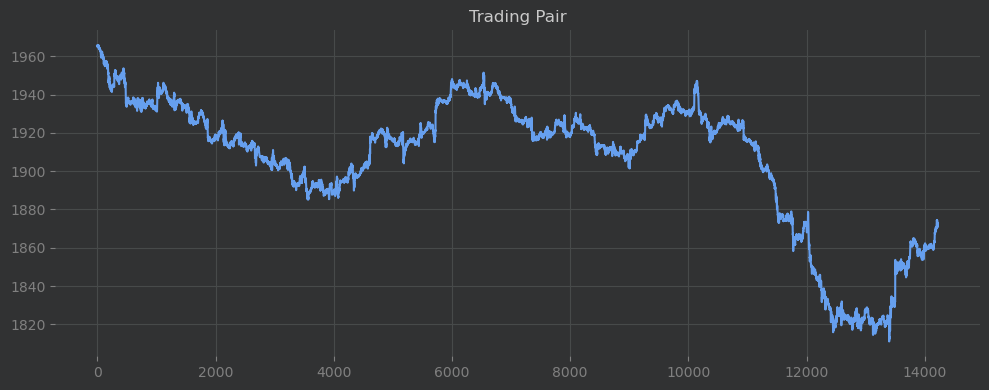

In [43]:

# Settings 
symbol = 'XAUUSD'
timeframe = mt5.TIMEFRAME_M5
start_date = datetime(2023, 8, 1)
end_date = datetime.now()

# Function 
def GetMTData():
    mt5.initialize()
    bars = pd.DataFrame(mt5.copy_rates_range(symbol, timeframe, start_date, end_date))
    bars['time'] = pd.to_datetime(bars['time'], unit='s')
    return bars

xauusd = GetMTData()
# xauusd.tail()


# Plotting the figue
def PlotCloseData(data):
    plt.figure(figsize = (10,4))
    plt.plot(data.close)
    #plt.grid(False)
    plt.title('Trading Pair')
    plt.tight_layout()
   
# PlotCloseData(xauusd)

MAF = talib.MA(xauusd.close, timeperiod=20, matype=0)
MAS = talib.MA(xauusd.close, timeperiod=50, matype=0)

BuySignal = (MAF >= MAS)  
SellSignal = (MAS <= MAF)  

buys = BuySignal  
sells = SellSignal  

pf = vbt.Portfolio.from_signals(xauusd.close,entries= buys, exits= sells, size=300)
print(pf.stats())
pf.plot().show()


PlotCloseData(xauusd)


    
    

c:\Users\User\anaconda3\anaconda_3\lib\site-packages\vectorbt\generic\stats_builder.py:396: UserWarning:

Metric 'sharpe_ratio' requires frequency to be set

c:\Users\User\anaconda3\anaconda_3\lib\site-packages\vectorbt\generic\stats_builder.py:396: UserWarning:

Metric 'calmar_ratio' requires frequency to be set

c:\Users\User\anaconda3\anaconda_3\lib\site-packages\vectorbt\generic\stats_builder.py:396: UserWarning:

Metric 'omega_ratio' requires frequency to be set

c:\Users\User\anaconda3\anaconda_3\lib\site-packages\vectorbt\generic\stats_builder.py:396: UserWarning:

Metric 'sortino_ratio' requires frequency to be set



Start                             0.000000
End                           14219.000000
Period                        14220.000000
Start Value                     100.000000
End Value                       100.000000
Total Return [%]                  0.000000
Benchmark Return [%]             -4.769802
Max Gross Exposure [%]            0.000000
Total Fees Paid                   0.000000
Max Drawdown [%]                       NaN
Max Drawdown Duration                  NaN
Total Trades                      0.000000
Total Closed Trades               0.000000
Total Open Trades                 0.000000
Open Trade PnL                    0.000000
Win Rate [%]                           NaN
Best Trade [%]                         NaN
Worst Trade [%]                        NaN
Avg Winning Trade [%]                  NaN
Avg Losing Trade [%]                   NaN
Avg Winning Trade Duration             NaN
Avg Losing Trade Duration              NaN
Profit Factor                          NaN
Expectancy 

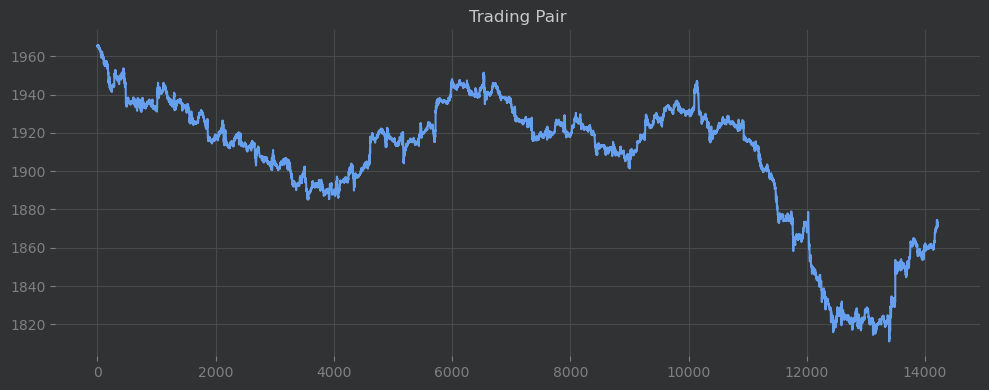

In [38]:

# Settings 
symbol = 'XAUUSD'
timeframe = mt5.TIMEFRAME_M5
start_date = datetime(2023, 8, 1)
end_date = datetime.now()

# Function 
def GetMTData():
    mt5.initialize()
    bars = pd.DataFrame(mt5.copy_rates_range(symbol, timeframe, start_date, end_date))
    bars['time'] = pd.to_datetime(bars['time'], unit='s')
    return bars

xauusd = GetMTData()
# xauusd.tail()


# Plotting the figue
def PlotCloseData(data):
    plt.figure(figsize = (10,4))
    plt.plot(data.close)
    #plt.grid(False)
    plt.title('Trading Pair')
    plt.tight_layout()
   
# PlotCloseData(xauusd)

MAF = talib.MA(xauusd.close, timeperiod=20, matype=0)
MAS = talib.MA(xauusd.close, timeperiod=50, matype=0)

global BuySignal  
global SellSignal


BuySignal = (MAF >= MAS)  
SellSignal = (MAS <= MAF)  

def VBT_Backtest():
    global BuySignal  
    global SellSignal

    buys = BuySignal  
    sells = SellSignal  
    
    pf = vbt.Portfolio.from_signals(xauusd.close, buys, sells, size=300)
    print(pf.stats())
    pf.plot().show()

if __name__ == '__main__':
    PlotCloseData(xauusd)
    VBT_Backtest()


0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
14215    1872.9785
14216    1872.9765
14217    1872.9055
14218    1872.8745
14219    1872.8275
Length: 14220, dtype: float64